# Model selection
## Shaid Beheshti University
#### Ahmad Mahmoudi-Aznaveh
###### http://facultymembers.sbu.ac.ir/a_mahmoudi/index.html

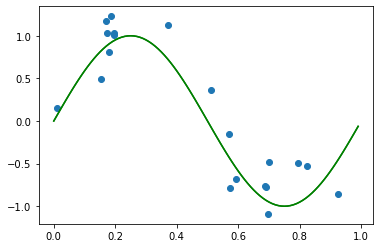

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math

NOS=100;
NOT=20;
degree=9
AON=1 #Noise Amplitude

x = np.arange(0, 1, 0.01);
y = np.sin(2*math.pi*x)
plt.plot(x, y,'g')

x1 = np.random.random(NOT);

r1=np.sin(2*math.pi*x1)+(np.random.random(NOT)-0.5)*AON;
#print(r1)

plt.scatter(x1, r1, marker='o')
plt.plot(x, y,'g')

(0.0, 1.1, -1.5, 1.5)

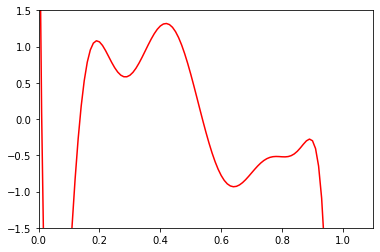

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x1.reshape(NOT,1),r1)
plt.plot(x, polyreg.predict(x.reshape(NOS,1)),'r')
plt.axis([0, 1.1, -1.5, 1.5])

[0.65831449 0.19247111 0.18704968 0.07946092 0.07830736 0.03794247
 0.03794234 0.03792534 0.03004945 0.02603226 0.02469285 0.02440326]
[5.08335410e-01 2.25189607e-01 2.40911696e-01 1.59934526e-02
 2.08646160e-02 2.48664001e-01 2.49376854e-01 2.27760133e-01
 3.88397176e+00 6.13823542e+00 1.35088029e+01 2.09132343e+02]


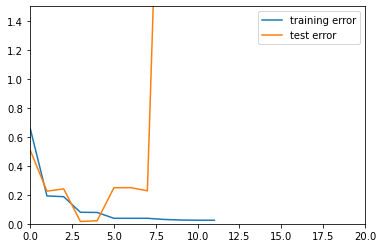

In [22]:
from sklearn.metrics import mean_squared_error
mse_test=np.zeros(12);
mse_train=np.zeros(12);
for k in range(0,12):
    degree=k
    polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
    polyreg.fit(x1.reshape(NOT,1),r1)
    mse_train[k]=mean_squared_error(r1, polyreg.predict(x1.reshape(NOT,1)))
    mse_test[k]=mean_squared_error(y, polyreg.predict(x.reshape(NOS,1)))
    
plt.plot(mse_train)
plt.plot(mse_test)
plt.legend(['training error', 'test error'])
plt.axis([0, 20, 0, 1.5])

print(mse_train)
print(mse_test)
